Code to quickly examine the accepted + rejected event statistics in the housekeeping files. Good for bad data. Edit times, paths below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import astropy
import astropy.units as u
from datetime import timezone
import datetime

import copy

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import lightcurves as lc

In [2]:

datapath='/Users/jmdunca2/nustar/jul-2024/21012007001/'
obsid='21012007001'

evtA = glob.glob(datapath+'/event_cl/*A06_cl.evt')
evtB = glob.glob(datapath+'/event_cl/*B06_cl.evt')
hkA  = glob.glob(datapath+'/hk/*A_fpm.hk')
hkB  = glob.glob(datapath+'/hk/*B_fpm.hk')


#Load in the evt file (has the list of photons)
evtdataA, hdrA = lc.load_nufiles(evtA[0])
# Load in the hk file (has the livetime info)
lvdataA, lvhdrA = lc.load_nufiles(hkA[0])
evtdataB, hdrB = lc.load_nufiles(evtB[0])
lvdataB, lvhdrB = lc.load_nufiles(hkB[0])

res = lc.get_a_nustar_lightcurve(evtdataA, hdrA, lvdataA, lvhdrA, timebin=10, livetime_corr=False, event_stats=True)
times_converted, countrate, lvt, counts, acc_sample, rej_sample, all_sample = res

#timerange=[datetime.datetime(2024, 7, 17, 6, 15), datetime.datetime(2024, 7, 17, 7, 17)]
timerange=[datetime.datetime(2024, 7, 17, 4, 40), datetime.datetime(2024, 7, 17, 5, 40)]
#timerange=[datetime.datetime(2024, 7, 16, 19, 3,30), datetime.datetime(2024, 7, 16, 20, 3)]
#timerange=[datetime.datetime(2024, 7, 16, 17, 26), datetime.datetime(2024, 7, 16, 18, 29)]
#timerange=[datetime.datetime(2024, 7, 16, 11, 3,0), datetime.datetime(2024, 7, 16, 12, 3)]

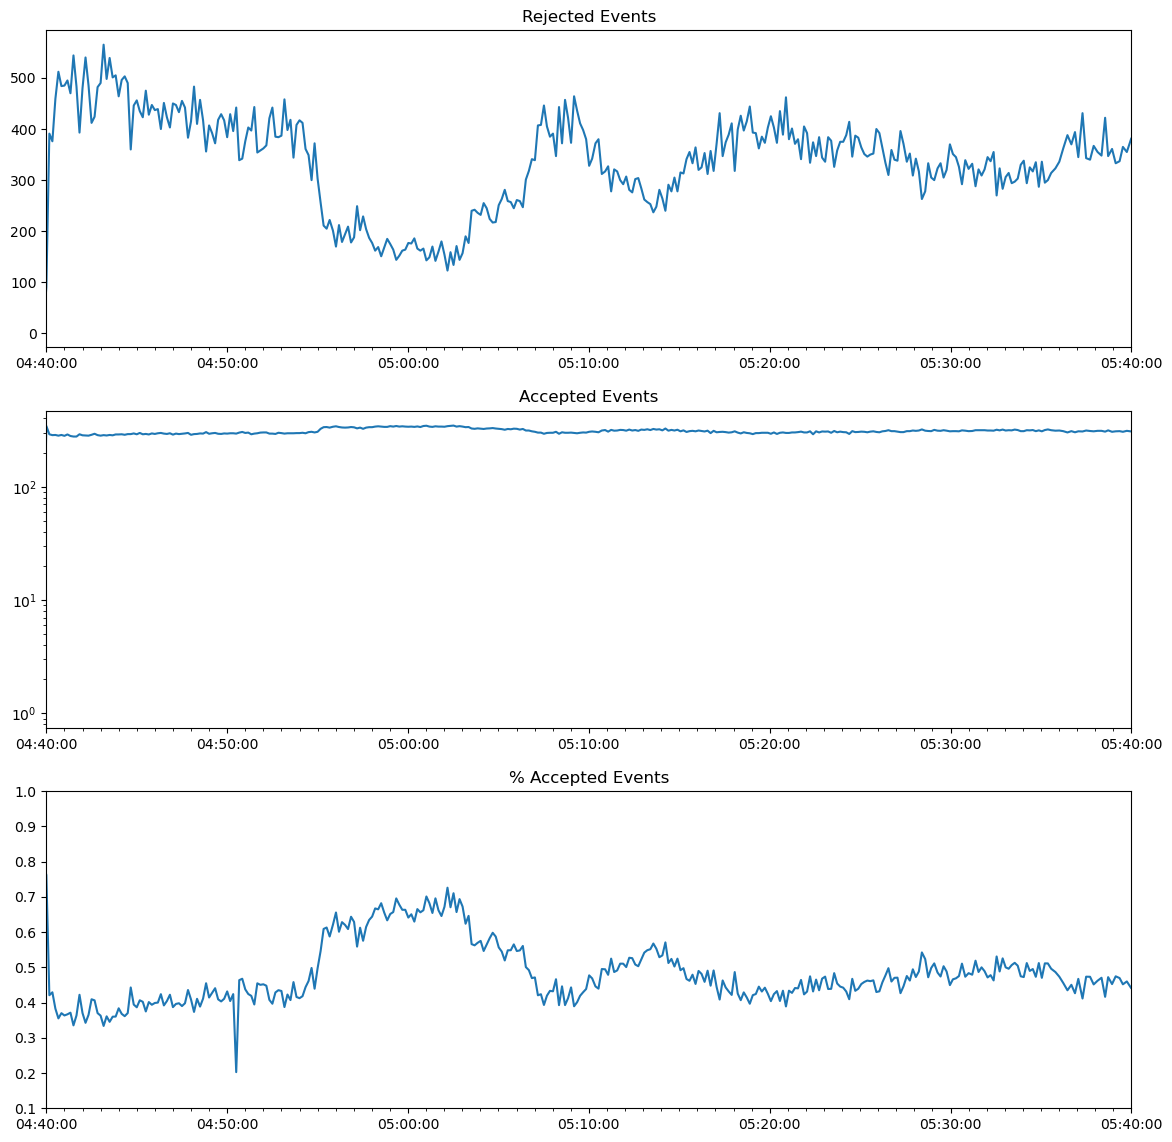

In [3]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(3,1,(1))

ax.plot(times_converted, rej_sample)
ax.set_title('Rejected Events')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.set_xlim(timerange[0], timerange[1])

#fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(3,1,(2))

ax.plot(times_converted, acc_sample)
ax.set_title('Accepted Events')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.set_xlim(timerange[0], timerange[1])
ax.set_yscale('log')

# fig = plt.figure(figsize=(14,4))
# ax = fig.add_subplot(1,1,(1))

# ax.plot(times_converted, all_sample)
# ax.set_title('Events')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
# ax.set_xlim(timerange[0], timerange[1])

#fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(3,1,(3))

ax.plot(times_converted, acc_sample/all_sample)
ax.set_title('% Accepted Events')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.set_xlim(timerange[0], timerange[1])
ax.set_ylim(0.1, 1)
#ax.set_yscale('log')

plt.savefig(obsid+'_accept_reject_plot.png')